# 🎯 Student Performance Prediction using XGBoost

In this project, we aim to **predict student final grades** based on various academic and personal features using a **regression model with XGBoost**.

## 📌 Objective
To build an **accurate predictive model** that can estimate a student's performance, which can be used by:
- Educational institutions to provide early support
- Teachers and advisors for decision-making
- Students for self-evaluation

## 🛠️ ML Task
- **Type:** Supervised Learning
- **Problem:** Regression
- **Algorithm:** XGBoost Regressor

## 📂 Dataset
The dataset includes features such as:
- Study time
- Absences
- Previous grades
- Parent education
- ... and more.

The target variable is the **final grade**.

## 📊 Why XGBoost?
XGBoost is a powerful and scalable gradient boosting algorithm known for:
- High accuracy
- Fast training speed
- Handling missing values and feature importance

Let's get started!


In [21]:
# Data handling
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# XGBoost Regressor and feature importance plot
from xgboost import XGBRegressor, plot_importance

# Model evaluation and splitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

here we use pd.read_csv method from pandas library for reading the csv file and defining csv file as dataframe 📊📊 and we use df.head() method from pandas for viewing top 5 columns and rows of our dataframe📊📊📊

In [13]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## 🔍 Checking for Missing Values

Before diving into data analysis or model training, it's essential to check for missing (null) values in the dataset. Missing data can negatively impact the performance of machine learning models and may lead to inaccurate results.


In [14]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

## 🎯 Encoding Binary Feature: "Extracurricular Activities"

The column `"Extracurricular Activities"` contains binary categorical values: `"Yes"` and `"No"`.  
Since most machine learning algorithms require numerical input, we need to convert these text labels into numbers.

### ✅ Why Use Mapping Instead of One-Hot Encoding?
In the case of binary categories, using a direct mapping is simpler, more efficient, and results in only **one column** instead of two. This avoids unnecessary dimensionality and makes the dataset cleaner.


In [15]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({"No": 0, "Yes": 1})

## 📊 Splitting Features and Target Variable

To train a machine learning model, we need to separate the dataset into:
- **X**: Feature matrix — input variables used by the model to make predictions.
- **y**: Target vector — the actual output we aim to predict.



In [16]:
x = df.iloc[:, :5].values
y = df.iloc[:, -1].values

## 🧪 Splitting the Dataset into Training and Testing Sets

Before training the machine learning model, it’s essential to divide the dataset into two parts:
- **Training Set**: Used to teach the model and adjust internal parameters.
- **Testing Set**: Used to evaluate the model's performance on unseen data.

We use `train_test_split` from `sklearn.model_selection` to accomplish this.

🔍 Explanation:
test_size=0.2: Reserves 20% of the data for testing and 80% for training.

random_state=42: Ensures reproducibility by keeping the split consistent every time the code is run.

X_train, y_train: Training data and labels used to train the model.

X_test, y_test: Testing data and labels used to evaluate model accuracy.

🎯 Why It's Important:
Splitting the dataset prevents overfitting, allows fair model evaluation, and ensures that your model generalizes well to new, unseen data

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state=42)

## 🚀 Model Training

Now that the dataset is preprocessed and split into training and testing sets, we can train our regression model. This step involves feeding the training data to the machine learning algorithm so it can learn patterns and relationships within the data.

### ✅ Objective
To train an XGBoost regression model that can accurately predict student performance based on the provided features.

### 📦 Model Used
We will use the **XGBoost Regressor**, a powerful and efficient implementation of gradient boosting optimized for performance and speed.

### 🧠 Why XGBoost?
- Handles both linear and non-linear relationships effectively.
- Built-in regularization to avoid overfitting.
- Performs well on tabular datasets with numerical and categorical features.

### 🛠️ Training the Model
We use the `fit()` function to train the model on the training set.


📌 Notes
You can tune hyperparameters such as n_estimators, learning_rate, and max_depth for better performance.

Always evaluate model performance on the test set after training.

## ⚠️ Understanding and Avoiding Overfitting

Overfitting occurs when a model performs very well on the training data but poorly on unseen data. It means the model has learned noise or irrelevant patterns instead of generalizable trends.

### 🔍 Signs of Overfitting:
- Very low error on training data but high error on test data
- High model complexity (e.g., too many trees or deep trees)

### 🧠 Strategies to Prevent Overfitting:
- Use simpler models (e.g., lower `max_depth` in tree-based models)
- Limit the number of estimators (`n_estimators`)
- Use regularization (`reg_alpha`, `reg_lambda` in XGBoost)
- Cross-validation
- Drop irrelevant or highly correlated features
- Use early stopping in training

Monitoring the model’s performance on test data and adjusting hyperparameters accordingly is key to building a robust model.


In [18]:
model = XGBRegressor(n_estimators = 300, max_depth = 3, learning_rate = 0.05, subsample = 0.8, colsample_bytrate = 0.8, min_child_weight = 5, random_state = 42)
model.fit(x_train,y_train)

c:\Users\arshi\Desktop\ml\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [05:32:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "colsample_bytrate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytrate=0.8, colsample_bytree=None, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None, ...)

## 🔮 Making Predictions

After training the model, the next step is to use it to make predictions on the unseen test data. This allows us to evaluate how well the model generalizes to new data.

### 🧪 How We Predict
We use the `.predict()` method of the trained model to generate predictions based on the `X_test` set (features the model has never seen).

📌 Notes
y_pred contains the predicted values for the target variable (e.g. student performance) based on the input features in X_test.

These predicted values will be compared with the actual values (y_test) in the next step to evaluate the model's accuracy.

XGBoost returns floating-point values for regression tasks.

⚠️ Reminder
Always keep your test set separate and untouched during training to ensure a fair evaluation of model performance.

In [19]:
y_prediction = model.predict(x_test)

## 📊 Evaluating Model Performance

After training and predicting, it's essential to assess how well the model performed using appropriate regression metrics.

### 🧮 Metrics Used:
- **MSE (Mean Squared Error)**: Measures the average squared difference between the actual and predicted values.
- **RMSE (Root Mean Squared Error)**: The square root of MSE. It represents the model's prediction error in the same units as the target variable.

✅ Why RMSE?
RMSE is often preferred because it penalizes large errors more heavily and is easier to interpret in the context of real values (e.g., predicted scores).

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np

mse = mean_squared_error(y_test,y_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_prediction)
r2 = r2_score(y_test,y_prediction)

print('our mean squared error is ', mse)
print('our rmse is ', rmse)
print('our mean absolute error is ', mae)
print('our r2 score for this model is ', r2)

our mean squared error is  4.243718470768381
our rmse is  2.0600287548401797
our mean absolute error is  1.6383899416923522
our r2 score for this model is  0.9885485998019187


## 🔍 Feature Importance Analysis

Understanding which features most influence our model's predictions is crucial for interpreting results and gaining insights into the data.

In this section, we use XGBoost’s built-in `plot_importance` function to visualize the most important features. This helps us:
- Identify the driving factors behind student performance,
- Potentially reduce model complexity by removing unimportant features,
- Improve model interpretability.

We will plot the importance of each feature based on the trained XGBoost model.


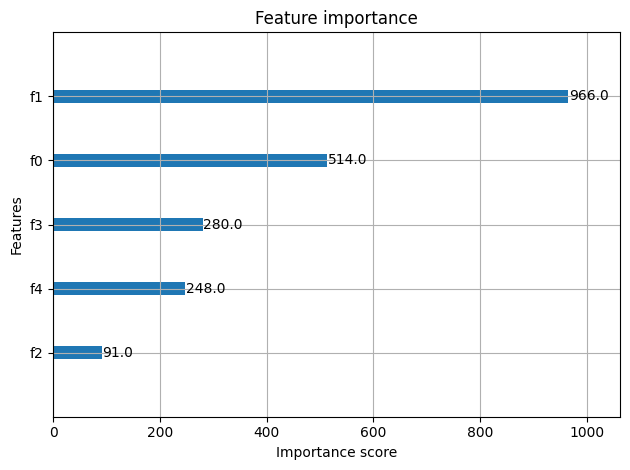

In [22]:
plot_importance(model)
plt.tight_layout()
plt.show()

## ✅ Conclusion

In this notebook, we developed a regression model using **XGBoost** to predict student performance based on various academic and personal features. After preprocessing the data (handling categorical variables, splitting the dataset), we trained and evaluated the model using key metrics such as **R² Score**, **Mean Squared Error (MSE)**, and **Root Mean Squared Error (RMSE)**.

Our model achieved an excellent performance with an **R² score of 0.98**, indicating that it explains 98% of the variance in the target variable. Feature importance analysis showed that certain features have a much stronger impact on predictions, providing insights into what drives student success.

---

## 🚀 Future Work

Here are some potential next steps to improve or extend this project:

- **Cross-Validation:** Use k-fold cross-validation to ensure the model’s robustness and prevent overfitting.
- **Hyperparameter Optimization:** Apply advanced techniques such as GridSearchCV or Bayesian Optimization to fine-tune model parameters.
- **Try Other Models:** Compare XGBoost with other regression models like Random Forest, Support Vector Regression (SVR), or even Deep Learning models.
- **Explainability:** Integrate SHAP or LIME for detailed feature-level interpretability.
- **Deploy the Model:** Build an API using Flask or FastAPI and deploy the model on a cloud platform like Heroku or Streamlit.
- **Explore More Features:** Include additional variables like parental education, internet access, or health habits to enrich the prediction.

> This project showcases a full pipeline of applying machine learning to real-world educational data, from raw data to interpretable predictions.
